In [1]:
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

## GBIF API querying
These cells do not need to be run if the relevant data has already been exported to CSV. 

In [2]:
base = "https://api.gbif.org/v1/"

In [3]:
# adapted from mediawiki:

def occurrence_query(request):
    print('start function')
    request['offset'] = 0
    count_entries = 0 
    print('begin looping')
    counter = ""
    while True:
        # Clone original request
        #print('start of loop')
        counter = counter + "."
        req = request.copy()
        # Modify it with the values returned in the 'continue' section of the last result.
        #req.update(offsetNumber) 
        # Call API
        #print("about to get results")
        result = requests.get(base+"occurrence/search", params=req).json()
        #print("got results")
        if count_entries == 0:
            print("expected length: " + str(result['count']) + " entries")
        if 'error' in result:
            print('error in result')
            raise Exception(result['error'])
        if 'warnings' in result:
            print('warnings in result')
            print(result['warnings'])
        if len(counter) % 5 == 0:
            print(str(len(counter)) + " loops")
        if 'results' in result:
            #print('query in result')
            yield result['results']
        if result['endOfRecords']:
            print("end: " + str(len(counter)) + " loops")
            break
        count_entries = count_entries + result['limit']
        request['offset'] = count_entries 

In [4]:
### DEFINING KEYS ###
s_ottr_key = requests.get(base+"species/?name=Enhydra lutris nereis").json()['results'][0]['nubKey']
n_ottr_key = requests.get(base+"species/?name=Enhydra lutris kenyoni").json()['results'][0]['nubKey']

g_kelp_key = requests.get(base+"species/?name=Macrocystis").json()['results'][1]['nubKey']
b_kelp_key = requests.get(base+"species/?name=Nereocystis").json()['results'][0]['nubKey']
e_grss_key = requests.get(base+"species/?name=Zostera marina").json()['results'][0]['nubKey']

p_urch_key = requests.get(base+"species/?name=Strongylocentrotus purpuratus").json()['results'][0]['nubKey']
s_crab_key = requests.get(base+"species/?name=Pachygrapsus crassipes").json()['results'][0]['nubKey']

w_shrk_key = requests.get(base+"species/?name=Carcharodon carcharias").json()['results'][0]['nubKey']


bio_key_list = [s_ottr_key,n_ottr_key,g_kelp_key,b_kelp_key,e_grss_key,p_urch_key,s_crab_key,w_shrk_key]

KeyboardInterrupt: 

In [6]:
# if you don't want to run the queries: 
bio_key_list = [6163936, 6163935, 3195765, 3195802, 2863967, 2278852, 2225812, 2420694]

s_ottr_key = bio_key_list[0]
n_ottr_key = bio_key_list[1]
g_kelp_key = bio_key_list[2]
b_kelp_key = bio_key_list[3]
e_grss_key = bio_key_list[4]
p_urch_key = bio_key_list[5]
s_crab_key = bio_key_list[6]
w_shrk_key = bio_key_list[7]

bio_key_list

[6163936, 6163935, 3195765, 3195802, 2863967, 2278852, 2225812, 2420694]

In [7]:
param = {'stateProvince':'California',
         'limit':300,
         'taxonKey':s_ottr_key}

In [8]:
res = requests.get(base+"occurrence/search",params=param).json()
occurrence_header = pd.DataFrame(res['results']).head(n=0) # create header

In [9]:
param['taxonKey'] = s_ottr_key
temp_df = occurrence_header.copy()
result_counter = 1
#result_dict = {}
for result in occurrence_query(param):
    #print("starting on result: " + str(result_counter))
    #print("look at result")
    #print(type(result[0]))
    #result_dict[result_counter] = pd.DataFrame(result)
    temp_df = pd.concat([temp_df,pd.DataFrame(result)],axis=0,join='outer')
    #if result_counter % 5 == 0:
    #    print("finished on result: " + str(result_counter))
    result_counter = result_counter + 1
print(len(temp_df))

s_ottr_df = temp_df.copy()
s_ottr_df.head()

start function
begin looping
expected length: 5666 entries
5 loops
10 loops
15 loops
end: 19 loops
5666


,key,datasetKey,publishingOrgKey,installationKey,hostingOrganizationKey,publishingCountry,protocol,lastCrawled,lastParsed,crawlId,...,recordNumber,coordinatePrecision,disposition,ownerInstitutionCode,footprintSRS,higherGeographyID,bibliographicCitation,typifiedName,datasetID,typeStatus
0,4510421312,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-04-13T03:17:28.912+00:00,2024-04-13T13:38:05.352+00:00,449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4510406828,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-04-13T03:17:28.912+00:00,2024-04-13T14:26:38.137+00:00,449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4510385836,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-04-13T03:17:28.912+00:00,2024-04-13T14:27:04.535+00:00,449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4510142854,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-04-13T03:17:28.912+00:00,2024-04-13T14:27:14.665+00:00,449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4510176891,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-04-13T03:17:28.912+00:00,2024-04-13T13:37:26.478+00:00,449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,crawlId,taxonKey,kingdomKey,phylumKey,classKey,orderKey,familyKey,genusKey,speciesKey,...,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,year,month,day,startDayOfYear,endDayOfYear,individualCount,coordinatePrecision
count,5.666000e+03,5666.000000,5666.0,5666.0,5666.0,5666.0,5666.0,5666.0,5666.0,5666.0,...,5217.000000,5217.000000,3176.000000,5654.000000,5630.000000,5576.000000,5602.000000,5602.000000,31.0,12.00000
mean,2.307838e+09,559.566890,6163936.0,1.0,44.0,359.0,732.0,5307.0,2433669.0,2433670.0,...,36.331469,-121.482550,25181.270318,2011.481960,6.418472,15.788917,179.703677,179.750268,1.0,0.00001
std,1.345442e+09,113.133324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.802822,2.456906,16739.856127,11.419131,3.269069,8.913099,99.669719,99.705180,0.0,0.00000
min,4.483745e+07,127.000000,6163936.0,1.0,44.0,359.0,732.0,5307.0,2433669.0,2433670.0,...,32.621381,-124.075541,23.000000,1870.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.00001
25%,8.917170e+08,449.000000,6163936.0,1.0,44.0,359.0,732.0,5307.0,2433669.0,2433670.0,...,35.431000,-121.914000,28476.000000,2005.000000,4.000000,8.000000,93.000000,93.000000,1.0,0.00001
50%,2.422879e+09,671.000000,6163936.0,1.0,44.0,359.0,732.0,5307.0,2433669.0,2433670.0,...,36.691235,-121.769443,28476.000000,2014.000000,7.000000,16.000000,184.000000,184.000000,1.0,0.00001
75%,3.410933e+09,671.000000,6163936.0,1.0,44.0,359.0,732.0,5307.0,2433669.0,2433670.0,...,36.896879,-120.921936,28505.000000,2019.000000,9.000000,23.000000,260.000000,261.000000,1.0,0.00001
max,4.607562e+09,671.000000,6163936.0,1.0,44.0,359.0,732.0,5307.0,2433669.0,2433670.0,...,41.368400,-21.884000,737734.000000,2024.000000,12.000000,31.000000,366.000000,366.000000,1.0,0.00001


### Exporting generated dataframes to CSV: 

In [34]:
s_ottr_df.to_csv("s_ottr_df_raw.csv")
n_ottr_df.to_csv("n_ottr_df_raw.csv")
g_kelp_df.to_csv("g_kelp_df_raw.csv")
b_kelp_df.to_csv("b_kelp_df_raw.csv")
p_urch_df.to_csv("p_urch_df_raw.csv")
e_grss_df.to_csv("g_kelp_df_raw.csv")
s_crab_df.to_csv("s_crab_df_raw.csv")
w_shrk_df.to_csv("w_shrk_df_raw.csv")

## Miscellaneous explorations: 

In [17]:
dict(s_otter_df.isna().sum())

{'key': 0,
 'datasetKey': 0,
 'publishingOrgKey': 0,
 'installationKey': 0,
 'hostingOrganizationKey': 0,
 'publishingCountry': 0,
 'protocol': 0,
 'lastCrawled': 0,
 'lastParsed': 0,
 'crawlId': 0,
 'extensions': 0,
 'basisOfRecord': 0,
 'occurrenceStatus': 0,
 'sex': 2767,
 'lifeStage': 3191,
 'taxonKey': 0,
 'kingdomKey': 0,
 'phylumKey': 0,
 'classKey': 0,
 'orderKey': 0,
 'familyKey': 0,
 'genusKey': 0,
 'speciesKey': 0,
 'acceptedTaxonKey': 0,
 'scientificName': 0,
 'acceptedScientificName': 0,
 'kingdom': 0,
 'phylum': 0,
 'order': 0,
 'family': 0,
 'genus': 0,
 'species': 0,
 'genericName': 0,
 'specificEpithet': 0,
 'infraspecificEpithet': 0,
 'taxonRank': 0,
 'taxonomicStatus': 0,
 'dateIdentified': 636,
 'decimalLatitude': 449,
 'decimalLongitude': 449,
 'coordinateUncertaintyInMeters': 2490,
 'stateProvince': 0,
 'gadm': 0,
 'year': 12,
 'month': 36,
 'day': 90,
 'eventDate': 10,
 'startDayOfYear': 64,
 'endDayOfYear': 64,
 'issues': 0,
 'modified': 420,
 'lastInterpreted':

<Axes: >

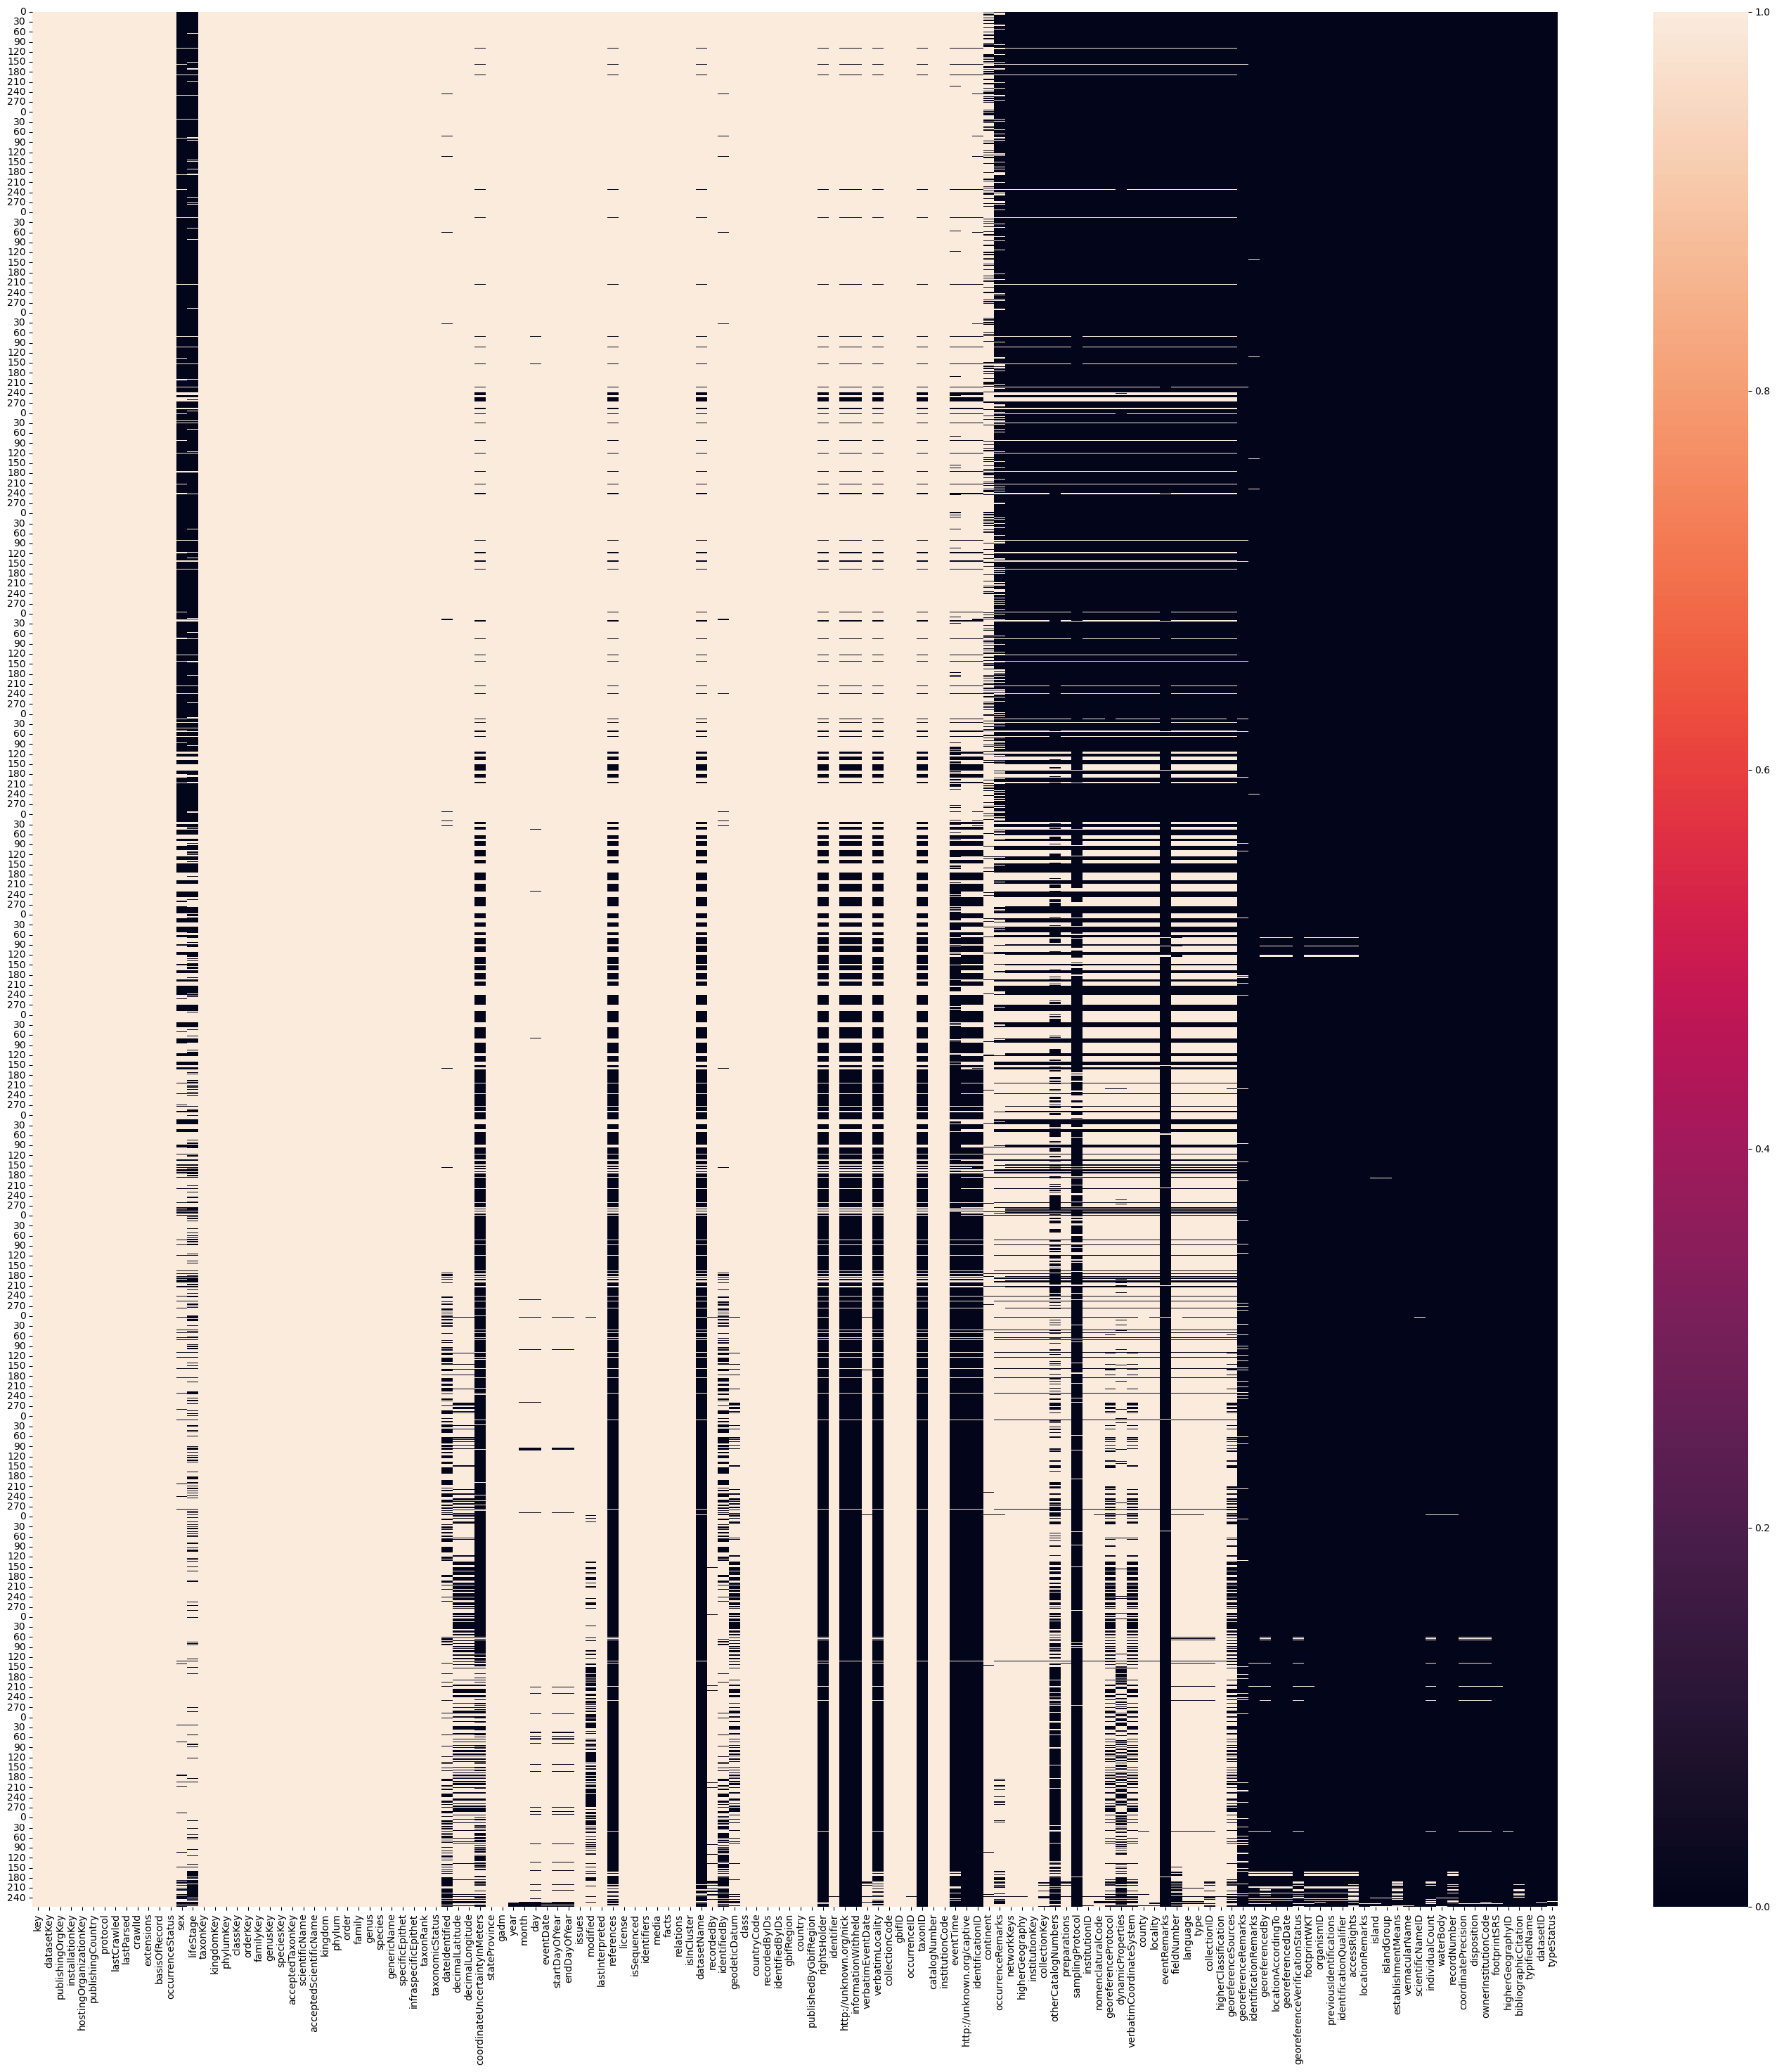

In [12]:
plt.figure(figsize=(35,35))
sns.heatmap(data=s_otter_df.notna())

In [79]:
#[x for x in outer_join_columns if not (x in inner_join_columns)] 

['georeferenceRemarks',
 'georeferencedBy',
 'references',
 'locationAccordingTo',
 'eventTime',
 'identificationRemarks',
 'georeferencedDate',
 'recordNumber',
 'footprintWKT',
 'organismID',
 'previousIdentifications',
 'identificationQualifier',
 'accessRights',
 'individualCount',
 'coordinatePrecision',
 'georeferenceVerificationStatus',
 'higherGeographyID',
 'disposition',
 'ownerInstitutionCode',
 'http://unknown.org/nick',
 'informationWithheld',
 'taxonID',
 'http://unknown.org/captive',
 'identificationID',
 'establishmentMeans',
 'bibliographicCitation',
 'typifiedName',
 'waterBody',
 'island',
 'islandGroup',
 'datasetID',
 'locationRemarks',
 'typeStatus',
 'footprintSRS',
 'vernacularName',
 'scientificNameID']